In [15]:
import numpy as np

import src.util as utils
import importlib
importlib.reload(utils)

<module 'src.util' from '/Users/tomas/PycharmProjects/uib-machine-learning/assignment-2/src/util.py'>

In [5]:
X = np.load("./data/emnist_hex_images.npy")
y = np.load("./data/emnist_hex_labels.npy")

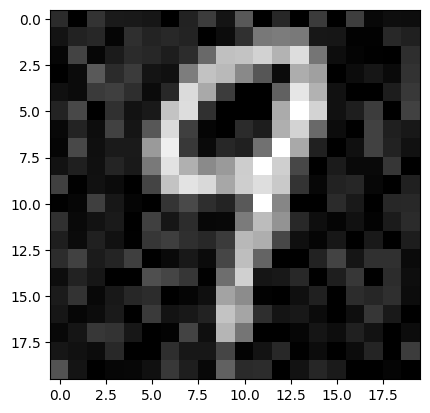

In [6]:
# visualize a number
utils.visualize_image(X[0])

In [16]:
utils.translate_label_to_class(16)

'EMPTY'